In [433]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [434]:
# Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [435]:
# Tải dữ liệu lên
test_data= pd.read_csv('/content/drive/MyDrive/csv/test.csv')
train_data= pd.read_csv('/content/drive/MyDrive/csv/titanic.csv' )

# Xem dữ liệu của 5 mẫu đầu của train
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [436]:
# Dữ liệu của 5 mẫu đầu của test
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Trực Quan Hóa Và Tiền Xử Lí Dữ Liệu Tập Train**

In [437]:
# Mô Tả Dữ Liệu
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [438]:
# Columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [439]:
# Data type of each column
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [440]:
# Number of missing values
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


=> Ta Thấy Cột Age và cột Cabin có nhiều giá trị bị thiếu hơn

Thông tin chi tiết

'**Survived**' là cột/biến mục tiêu.

'**PassengerId**', '**Name**' và '**Ticket**' không đóng góp vào biến mục tiêu '**Survived**'. Vì vậy, chúng ta có thể xóa nó khỏi dữ liệu.

'**Age**' và '**Embarked**' có ít giá trị bị thiếu hơn. Chúng ta phải quy gán chúng bằng những kỹ thuật khác nhau.

Vì có rất nhiều giá trị bị thiếu trong cột “**Cabin**”, chúng ta có thể xóa nó khỏi dữ liệu huấn luyện.

'**Pclass**', '**Sex**', '**SibSp**', '**Parch**', '**Fare**' không có bất kỳ giá trị nào bị thiếu.

Chúng ta cũng có thể tạo biến mới như '**tổng quy mô của gia đình**' từ các cột '**SibSp**' và '**Parch**'.

In [441]:
# Trực Quan Hóa dữ liệu 'Survived' (Cột Mục Tiêu)
# Theo chúng ta đã biết , phần lớn hành khách không thể sống.
# Dữ Liệu bị Mất Cân Bằng.

In [442]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Passenger Count')

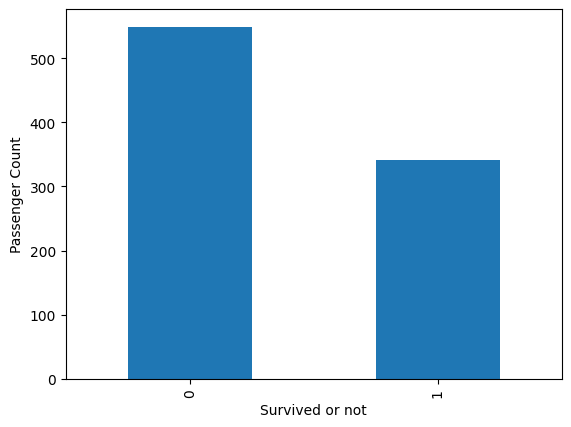

In [443]:
plt = train_data.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

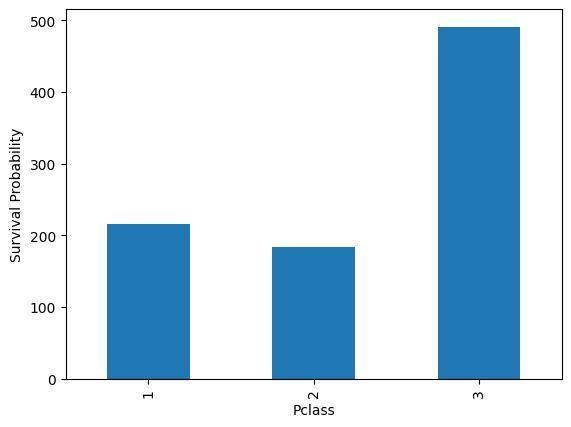

In [444]:
# Pclass
# Phần Lớn Học Sinh Là Cấp 3.
plt = train_data.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

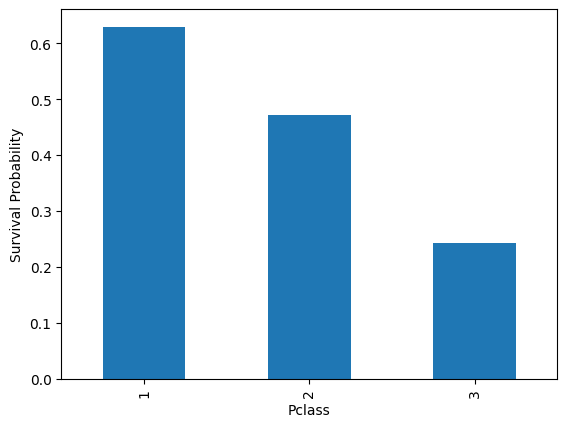

In [445]:
plt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind= 'bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

==> Từ kết quả trên có thể nói, lớp 1 có cơ hội sống sót cao hơn 2 lớp còn lại

## Sex
 Phần lớn trong số họ là Nam giới.

Text(0, 0.5, 'Passenger count')

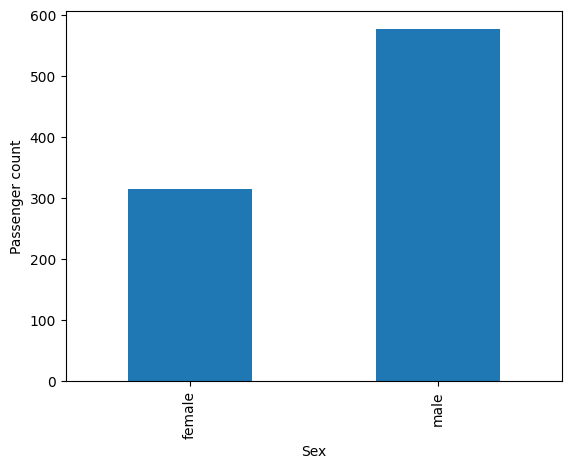

In [446]:
plt = train_data.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')


Như chúng ta thấy, khả năng sống sót của Nữ cao hơn. Họ có thể đã ưu tiên cho nữ nhiều hơn nam.

Text(0, 0.5, 'Survival Probability')

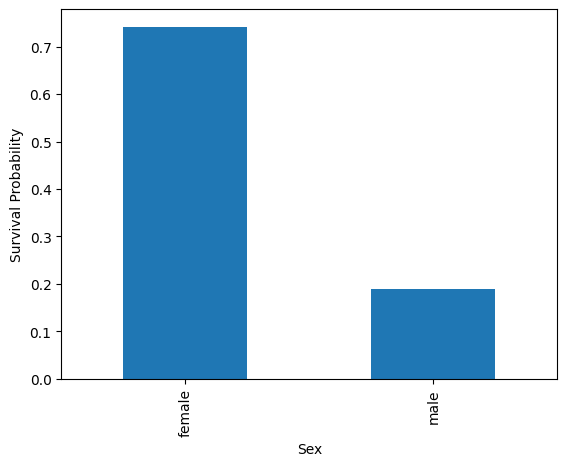

In [447]:
plt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

# Embarked

In [448]:
# Hầu hết trong số họ đến từ Southampton(S).

Text(0, 0.5, 'Passenger count')

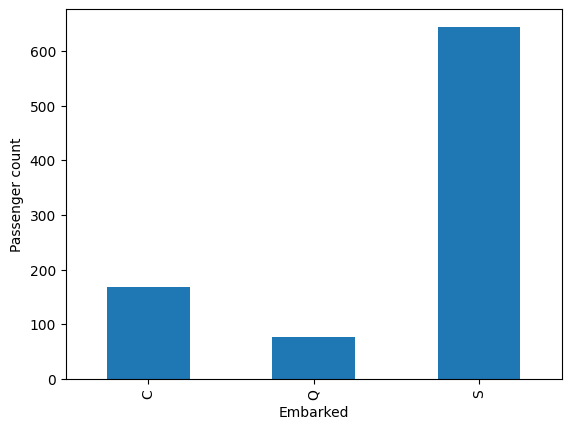

In [449]:
plt = train_data.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

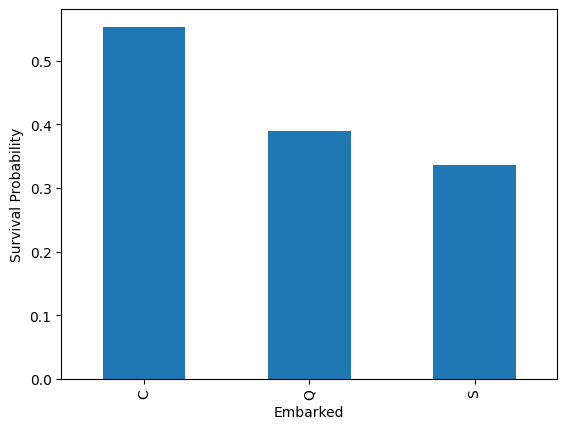

In [450]:
# Survival probability: C > Q > S
plt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

# SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

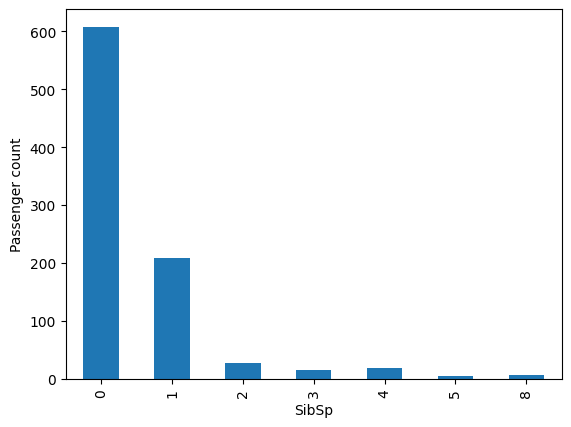

In [451]:
plt = train_data.SibSp.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

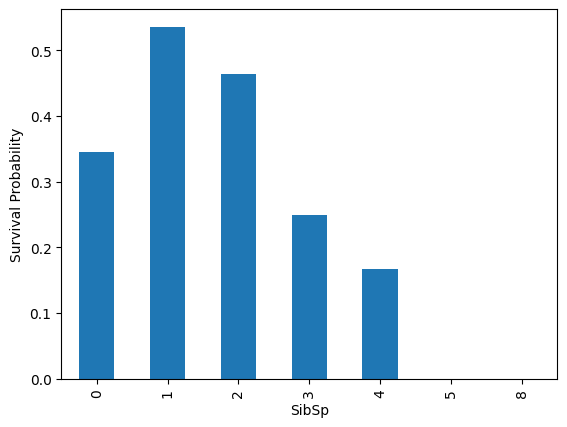

In [452]:
# Như chúng ta có thể thấy, phần lớn họ không có Anh chị em/Vợ/Chồng.
plt = train_data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

=> Những hành khách có anh chị em/vợ/chồng có khả năng sống sót cao hơn.
 '1' > '2' > '0' > '3' > '4'

# Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

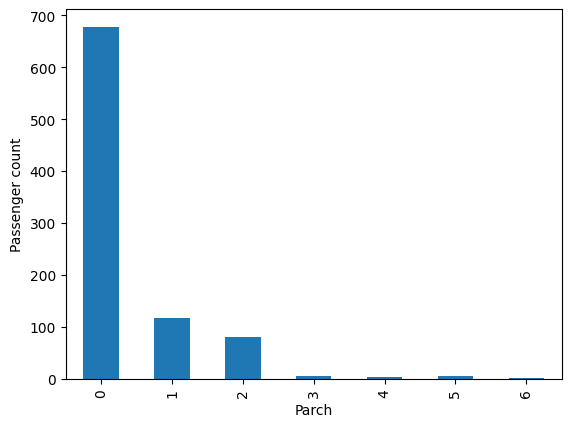

In [453]:
plt = train_data.Parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

=> Như chúng ta có thể thấy, phần lớn họ không có Con cái/Cha mẹ.

Text(0, 0.5, 'Survival Probability')

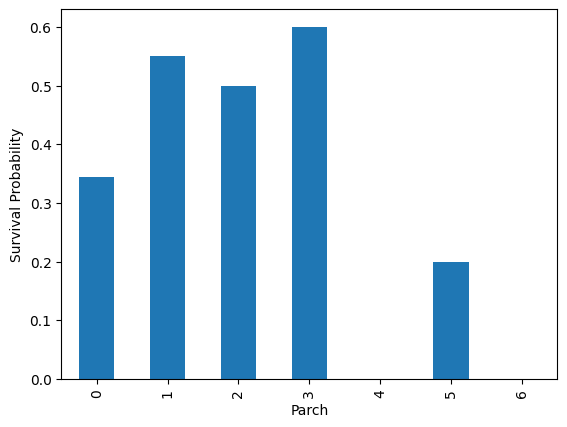

In [454]:
plt = train_data[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')


=> Những hành khách có ba con/cha mẹ có nhiều khả năng sống sót hơn. '3' > '1' > '2' > '0' > '5'

# Tạo một tính năng mới 'Family Size' từ các tính năng  'SibSp' and 'Parch'

In [455]:

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1



Xóa các cột không cần thiết

  

> Chúng tôi có thể xóa 'Ticket' và 'PassengerId' vì chúng không đóng góp cho hạng mục tiêu.



  

> Xóa 'Cabin' vì nó thiếu nhiều giá trị trong cả dữ liệu huấn luyện và dữ liệu kiểm tra



In [456]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1



Ánh xạ 'Sex' và 'Embarked' thành các giá trị số.

In [457]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


# Tiền xử lý 'Name'


> Trích xuất tiêu đề từ tên của hành khách và phân loại chúng.

> Bỏ Cột "Name"






<Axes: xlabel='Title'>

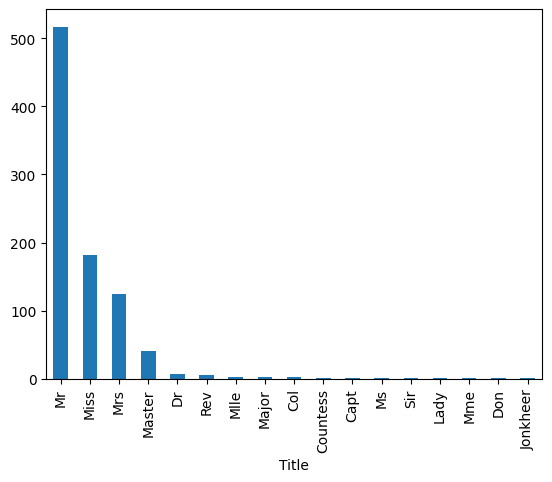

In [458]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')
train_data.Title.value_counts().plot(kind = 'bar')

Kết hợp một số lớp và nhóm tất cả các lớp hiếm vào 'Các lớp khác'.

Text(0, 0.5, 'Passenger count')

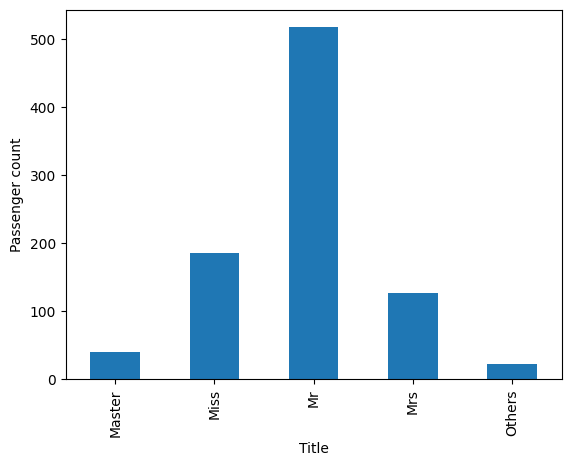

In [459]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
plt = train_data.Title.value_counts().sort_index().plot(kind = 'bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Khả năng sống sót của 'Miss' và 'Mrs' cao hơn so với các lớp khác.

Text(0, 0.5, 'Survival Probability')

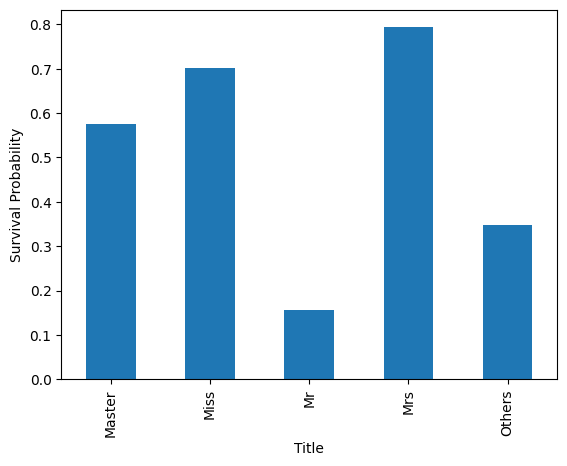

In [460]:
plt = train_data[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

Ánh xạ 'Title' thành các giá trị số

In [461]:
train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


 Correlation between columns


<Axes: >

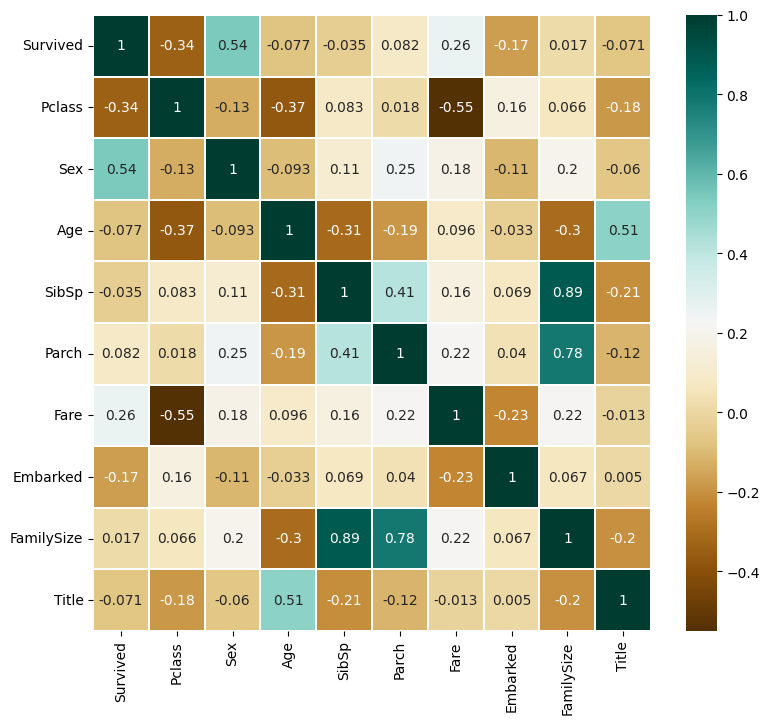

In [462]:
corr_matrix = train_data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

=>Không có cột có mối tương quan rất cao.

**Xử Lí Các Giá Trị Bị Thiếu**

In [463]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

Quy kết 'Embarked' với tầng lớp đa số

In [464]:
train_data['Embarked'].isnull().sum()


2

Có hai giá trị null trong cột 'Embarked'. Hãy quy kết chúng bằng cách sử dụng lớp đa số.

Lớp đa số là 'S'. Gán các giá trị không xác định (NaN) bằng cách sử dụng 'S'

In [465]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


# Thiếu giá trị - 'Age'

> Hãy tìm các cột hữu ích để dự đoán giá trị của "Age".




<Axes: >

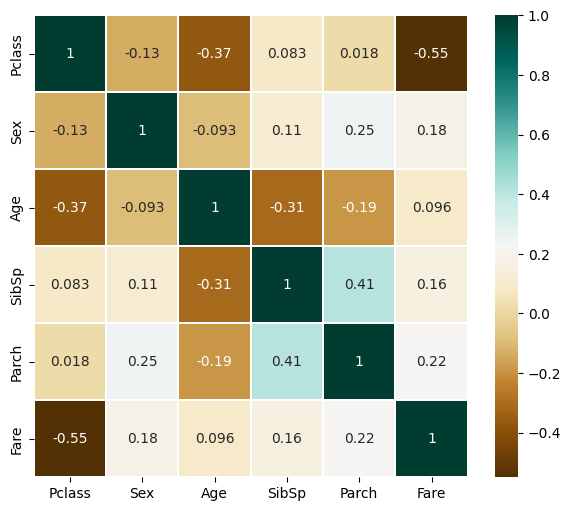

In [466]:
corr_matrix = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)


Tuổi tác không tương quan với 'Sex' và 'Fare'. Vì vậy, chúng tôi không xem xét hai cột này khi gán 'Sex'.

'Pclass', 'SibSp' và 'Parch' có mối tương quan nghịch với 'Sex'.

Hãy điền Age với độ tuổi trung bình của các hàng tương tự từ 'Pclass', 'SibSp' và 'Parch'. Nếu không có hàng tương tự, hãy điền độ tuổi bằng độ tuổi trung bình của tổng tập dữ liệu.

In [467]:
NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index
for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) & (train_data.Parch == train_data.iloc[i]["Parch"]) & (train_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        train_data['Age'].iloc[i] = pred_age
    else:
        train_data['Age'].iloc[i] = train_data['Age'].median()

<ipython-input-467-04f14b71af56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
<ipython-input-467-04f14b71af56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
<ipython-input-467-04f14b71af56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
<ipython-input-467-04f14b71af56>:5: SettingWithCopyWarning: 
A value is trying to 

In [468]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

=>Không có giá trị bị thiếu trong dữ liệu.


In [469]:
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


# **# Tiền Xử Lí Dữ Liệu Tập  Test**

In [470]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [471]:
# Bỏ các cột 'Ticket', 'PassengerId' và 'Cabin'
test_data = test_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
test_data.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [472]:
# Chuyển Đổi 'Sex' and 'Embarked' thành giá trị số
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,2
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,2


In [473]:
# Trích xuất 'Title' từ 'Name' và chuyển đổi thành giá trị Số.
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data = test_data.drop(columns='Name')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

test_data['Title'] = test_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [474]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,2.0
1,3,1,47.0,1,0,7.0000,2,3.0
2,2,0,62.0,0,0,9.6875,1,2.0
3,3,0,27.0,0,0,8.6625,2,2.0
4,3,1,22.0,1,1,12.2875,2,3.0


In [475]:
#Xem giá trị bị thiếu

In [476]:
test_data.isnull().sum()


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [477]:
# Quy định 'Age' bằng cách sử dụng trung vị của các cột 'SibSp', 'Parch' và 'Pclass'
NaN_indexes = test_data['Age'][test_data['Age'].isnull()].index

for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == test_data.iloc[i]["SibSp"]) & (train_data.Parch == test_data.iloc[i]["Parch"]) & (test_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(pred_age):
        test_data['Age'].iloc[i] = pred_age
    else:
        test_data['Age'].iloc[i] = train_data['Age'].median()

<ipython-input-477-e5e6f7bdda16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'].iloc[i] = pred_age
<ipython-input-477-e5e6f7bdda16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'].iloc[i] = pred_age
<ipython-input-477-e5e6f7bdda16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'].iloc[i] = pred_age
<ipython-input-477-e5e6f7bdda16>:7: SettingWithCopyWarning: 
A value is trying to be 

In [478]:
# Gán 'Tiêu đề' với chế độ của nó
title_mode = train_data.Title.mode()[0]
test_data.Title = test_data.Title.fillna(title_mode)

In [479]:
# Cho rằng 'Fare' là ý nghĩa của nó
fare_mean = train_data.Fare.mean()
test_data.Fare = test_data.Fare.fillna(fare_mean)

In [480]:
# Tạo một trường 'FamilySize' từ 'SibSp' và 'Parch'¶
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,0,34.5,0,0,7.8292,1,2.0,1
1,3,1,47.0,1,0,7.0000,2,3.0,2
2,2,0,62.0,0,0,9.6875,1,2.0,1
3,3,0,27.0,0,0,8.6625,2,2.0,1
4,3,1,22.0,1,1,12.2875,2,3.0,3


In [481]:
# Chia 'train data' thành 'training data' và 'validation data'
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [482]:
from sklearn.utils import shuffle
train_data = shuffle(train_data)
training_data, valid_data = train_test_split(train_data, test_size=0.2)
X_train = train_data.drop(columns='Survived')
y_train = train_data.Survived
y_train = pd.DataFrame({'Survived':y_train.values})
X_valid = valid_data.drop(columns='Survived')
y_valid = valid_data.Survived
X_test = test_data

# **Dữ Liệu Đã Được Xử Lí**

In [483]:
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
583,1,0,36.0,0,0,40.1250,0.0,1,2
736,3,1,48.0,1,3,34.3750,2.0,5,3
111,3,1,14.5,1,0,14.4542,0.0,2,1
74,3,0,32.0,0,0,56.4958,2.0,1,2
530,2,1,2.0,1,1,26.0000,2.0,3,1


In [484]:
y_train.head()


,Survived
0,0
1,0
2,0
3,1
4,1


In [485]:
X_train.shape
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
583,1,0,36.0,0,0,40.1250,0.0,1,2
736,3,1,48.0,1,3,34.3750,2.0,5,3
111,3,1,14.5,1,0,14.4542,0.0,2,1
74,3,0,32.0,0,0,56.4958,2.0,1,2
530,2,1,2.0,1,1,26.0000,2.0,3,1
...,...,...,...,...,...,...,...,...,...
129,3,0,45.0,0,0,6.9750,2.0,1,2
152,3,0,55.5,0,0,8.0500,2.0,1,2
633,1,0,38.5,0,0,0.0000,2.0,1,2
184,3,1,4.0,0,2,22.0250,2.0,3,1


In [486]:
y_train.shape


(891, 1)

In [487]:
X_test.head()
X_test = X_test[['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare','Embarked', 'FamilySize', 'Title']]
X_test



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,3,0,34.5,0,0,7.8292,1,1,2.0
1,3,1,47.0,1,0,7.0000,2,2,3.0
2,2,0,62.0,0,0,9.6875,1,1,2.0
3,3,0,27.0,0,0,8.6625,2,1,2.0
4,3,1,22.0,1,1,12.2875,2,3,3.0
...,...,...,...,...,...,...,...,...,...
413,3,0,30.0,0,0,8.0500,2,1,2.0
414,1,1,39.0,0,0,108.9000,0,1,2.0
415,3,0,38.5,0,0,7.2500,2,1,2.0
416,3,0,30.0,0,0,8.0500,2,1,2.0


# **Neural Network**


In [490]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras

# Chuẩn hóa dữ liệu sử dụng StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Xây dựng mạng neuron (neural network)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(X_train_scaled[0]),)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile và huấn luyện mạng neuron
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Chuẩn hóa dữ liệu kiểm tra sử dụng cùng scaler đã được fit trên dữ liệu huấn luyện
X_test_scaled = scaler.transform(X_valid)

# Đánh giá mô hình trên tập kiểm tra
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_valid , verbose=2)

# Dự đoán nhãn trên tập kiểm tra và tính F1 score
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)
f1_score_valid = f1_score(y_valid, y_pred_binary)

print(f"Neural Network model's F1 score on validation set is {round(f1_score_valid, 2)}.")

# Hiển thị báo cáo phân loại
report = classification_report(y_valid, y_pred_binary)
print(report)

Epoch 1/10
28/28 [==============================] - 1s 4ms/step - loss: 0.6552 - accuracy: 0.6308
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7262
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7531
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7576
Epoch 5/10
28/28 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.7767
Epoch 6/10
28/28 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.7991
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7980
Epoch 8/10
28/28 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.8025
Epoch 9/10
28/28 [==============================] - 0s 4ms/step - loss: 0.4595 - accuracy: 0.8036
Epoch 10/10
28/28 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8103
6/6 - 0s - loss: 0.

In [492]:
from sklearn.metrics import classification_report, f1_score

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scaling the validation data
X_valid_scaled = scaler.transform(X_valid)

# Dự đoán nhãn trên tập xác thực và tính F1 score
predictions_valid = rf_model.predict(X_valid_scaled)
f1_score_valid = f1_score(y_valid, predictions_valid)

print(f"Random Forest model's F1 score on validation set is {round(f1_score_valid, 2)}.")

# Hiển thị báo cáo phân loại
report = classification_report(y_valid, predictions_valid)
print(report)

Random Forest model's F1 score on validation set is 0.96.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.97      0.95      0.96        59

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179

